In [22]:
#作图时候可以减少图和colorbar之间的空白 紧凑一点会比较好 参数pad

In [23]:
pwd

u'/home/ynu/PLUTO/2020_revised'

In [24]:
cd /home/ynu/PLUTO/2020_revised/

/home/ynu/PLUTO/2020_revised


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyPLUTO as pp
%matplotlib inline

In [26]:
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.top']='True'
plt.rcParams['ytick.right']='True'
plt.rcParams['font.size']=14 #字体大小 包括xy轴的字体 colorbar的字体

In [27]:
D = pp.pload(20) # Loading the data into a pload object D.
#grid.out dbl.out should contain

In [28]:
type(D.rho.T)

numpy.ndarray

In [29]:
D.rho.T.size

4194304

In [30]:
D.rho.T.shape

(2048, 2048)

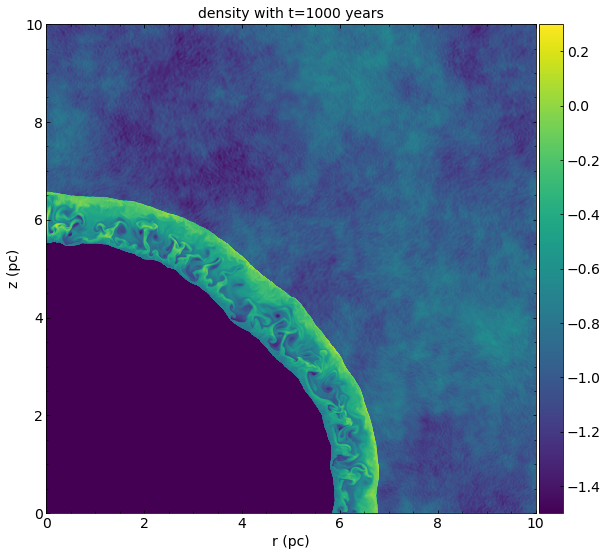

In [31]:
f1 = plt.figure(figsize=[12,9])
ax1 = f1.add_subplot(111)
plt.pcolormesh(D.x1,D.x2,np.log10(D.rho.T))
font1={'size':14}
plt.colorbar(pad=0.005)
plt.minorticks_on()
plt.clim(-1.5,0.3)
ax1.set_xlabel(r'r (pc)',font1)
ax1.set_ylabel(r'z (pc)',font1)
ax1.axis([0,10,0.0,10.0])
ax1.set_aspect('equal')
ax1.set_title(r'density with t=1000 years',font1)
plt.savefig('snr_2048.png',bbox_inches='tight')#不能存为pdf会跑挂

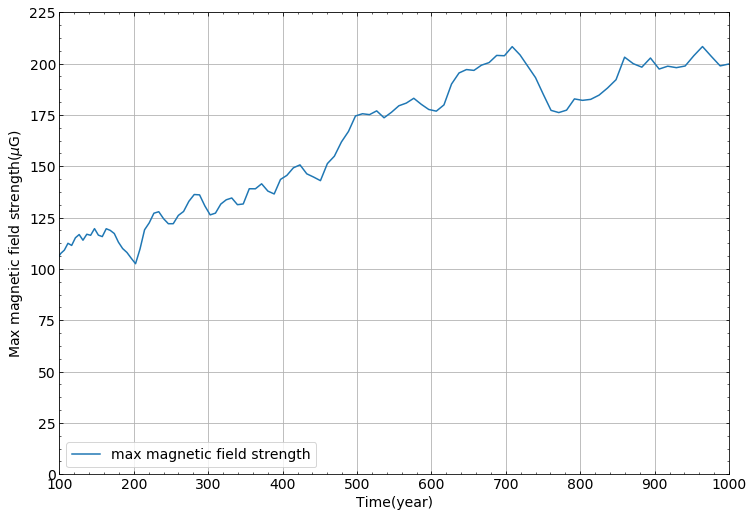

In [32]:
filename = 'maxmag_2048.txt'
X,Y = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        X.append(value[0])
        Y.append(value[1])
Xnew = np.array(X)
Ynew = np.array(Y)#mag in code unit
f2 = plt.figure(figsize=[12,8.5]) 
ax1 = f2.add_subplot(111) 
plt.plot(Xnew*1000.0,Ynew*460.0,label='max magnetic field strength')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=3,ncol=1)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax1.set_xlabel(r'Time(year)',font1) 
ax1.set_ylabel(r'Max magnetic field strength($\mu$G)',font1) 
ax1.axis([100,1000,0.0,225.0])
#ax1.set_title(r'radius profile with t=1000 years')
plt.savefig('radius_average_2048.png',bbox_inches='tight')#不能存为pdf会跑挂

In [33]:
D1 = pp.pload(9) # ~440 yrs

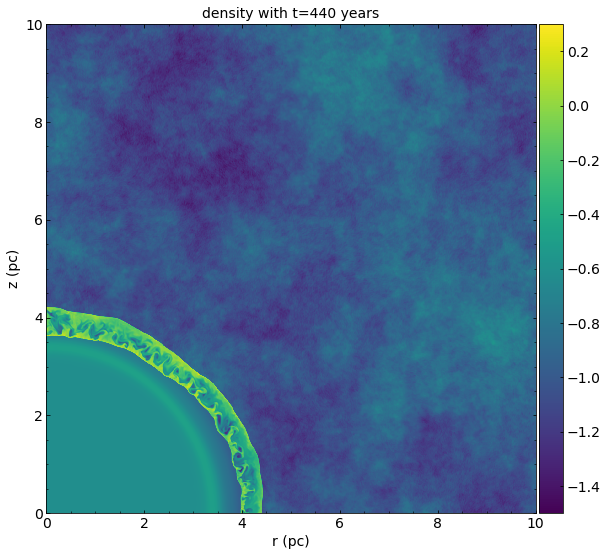

In [34]:
f1 = plt.figure(figsize=[12,9])
ax1 = f1.add_subplot(111)
plt.pcolormesh(D1.x1,D1.x2,np.log10(D1.rho.T))
font1={'size':14}
plt.colorbar(pad=0.005)
plt.minorticks_on()
plt.clim(-1.5,0.3)
ax1.set_xlabel(r'r (pc)',font1)
ax1.set_ylabel(r'z (pc)',font1)
ax1.axis([0,10,0.0,10.0])
ax1.set_aspect('equal')
ax1.set_title(r'density with t=440 years',font1)
plt.savefig('tycho.png',bbox_inches='tight')#不能存为pdf会跑挂

[0.0, 90.0, 4.1, 4.5]

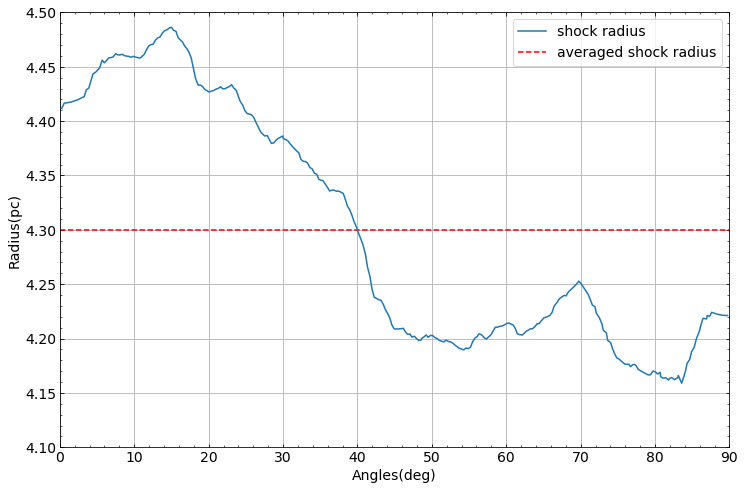

In [35]:
filename = 'radave300tycho.txt'
X1,Y1 = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        X1.append(value[0])
        Y1.append(value[1])
X1new = np.array(X1)
Y1new = np.array(Y1) # in order for mean() and other statistics funs
#print(X1new)
#print(Y1new)
#print(Y1new.mean())



f2 = plt.figure(figsize=[12,8]) 
ax2 = f2.add_subplot(111) 
#plt.plot(Xnew,Ynew)
plt.plot(X1new,Y1new,label='shock radius')
plt.hlines(y=Y1new.mean(),xmin=0.0,xmax=90.0,colors='r',linestyles='--',label='averaged shock radius')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax2.set_xlabel(r'Angles(deg)',fontdict=font1) 
ax2.set_ylabel(r'Radius(pc)',fontdict=font1) 
ax2.axis([0.0,90.0,4.1,4.5])

[0.0, 90.0, 3.7, 4.4]

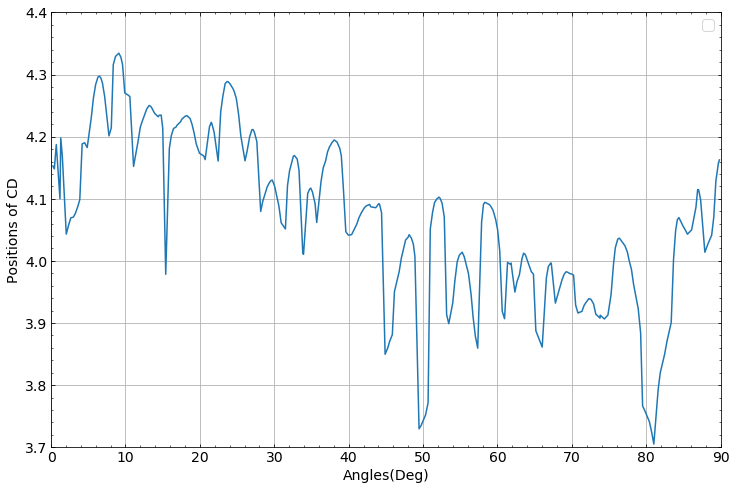

In [37]:
filename = 'rcdave300tycho.txt'
Xcd1,Ycd1 = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        Xcd1.append(value[0])
        Ycd1.append(value[1])
Xcd1new = np.array(Xcd1)
Ycd1new = np.array(Ycd1) # in order for mean() and other statistics funs

fcd = plt.figure(figsize=[12,8]) 
ax3 = fcd.add_subplot(111) 
plt.plot(Xcd1new,Ycd1new)
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
ax3.set_xlabel(r'Angles(Deg)') 
ax3.set_ylabel(r'Positions of CD') 
ax3.axis([0.0,90.0,3.7,4.4])

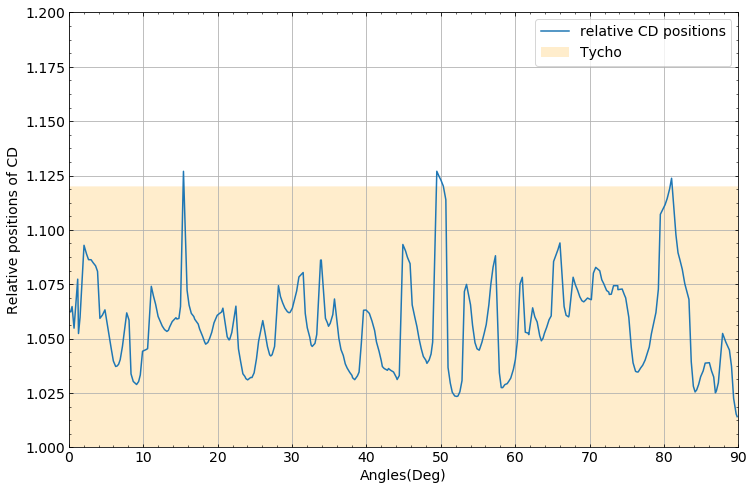

In [38]:
#fill the region of SN1006
Xfill = np.linspace(0.0,90.0,1000)
y1=1.00
y2=1.12


fcd = plt.figure(figsize=[12,8]) 
ax4 = fcd.add_subplot(111) 
plt.plot(Xcd1new,Y1new/Ycd1new,label='relative CD positions')
plt.fill_between(Xfill,y1,y2,facecolor='orange',alpha=0.2,label='Tycho')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax4.set_xlabel(r'Angles(Deg)',font1) 
ax4.set_ylabel(r'Relative positions of CD',font1) 
ax4.axis([0.0,90.0,1.0,1.2])
#ax1.set_title(r'radius profile with t=1000 years')
plt.savefig('cd_ratio_Tycho_2048.png',bbox_inches='tight')#不能存为pdf会跑挂

In [39]:
cd ..

/home/ynu/PLUTO


In [40]:
cd tycho_onlytur_440/

/home/ynu/PLUTO/tycho_onlytur_440


In [41]:
pwd

u'/home/ynu/PLUTO/tycho_onlytur_440'

In [42]:
D2 = pp.pload(20) #1000 yrs only tur

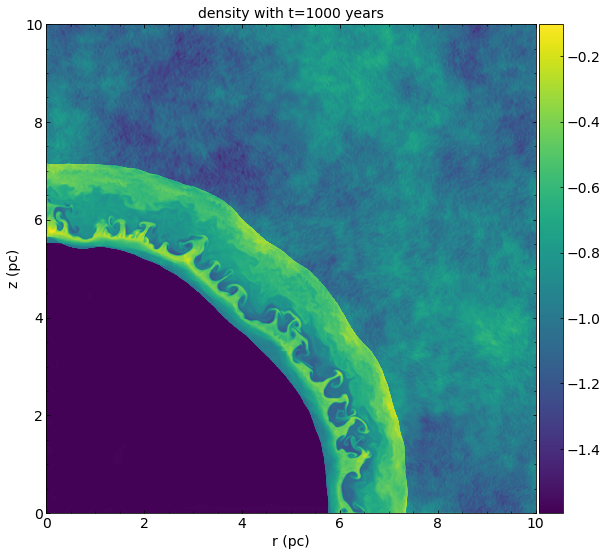

In [44]:
f1 = plt.figure(figsize=[12,9])
ax1 = f1.add_subplot(111)
plt.pcolormesh(D2.x1,D2.x2,np.log10(D2.rho.T))
font1={'size':14}
plt.colorbar(pad=0.005)
plt.minorticks_on()
#plt.clim(-1.5,0.3)
ax1.set_xlabel(r'r (pc)',font1)
ax1.set_ylabel(r'z (pc)',font1)
ax1.axis([0,10,0.0,10.0])
ax1.set_aspect('equal')
ax1.set_title(r'density with t=1000 years',font1)
plt.savefig('tycho_onlytur_1000yrs.png',bbox_inches='tight')#不能存为pdf会跑挂
#和20191202_tycho_2048比对过 一致

In [45]:
D3 = pp.pload(9) #~440 yrs only tur

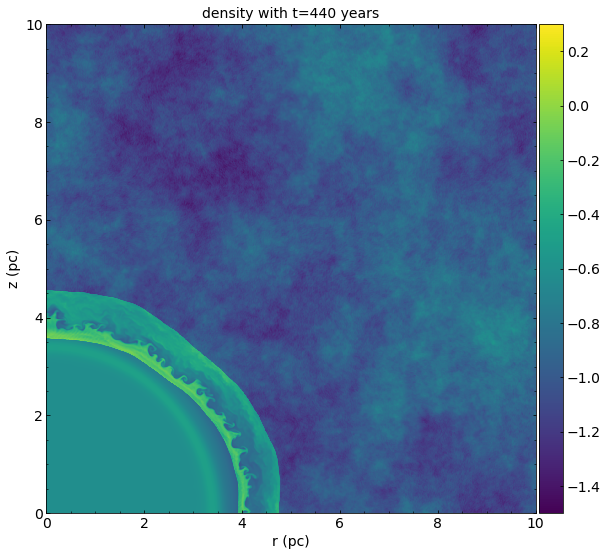

In [46]:
f1 = plt.figure(figsize=[12,9])
ax1 = f1.add_subplot(111)
plt.pcolormesh(D3.x1,D3.x2,np.log10(D3.rho.T))
font1={'size':14}
plt.colorbar(pad=0.005)
plt.minorticks_on()
plt.clim(-1.5,0.3)
ax1.set_xlabel(r'r (pc)',font1)
ax1.set_ylabel(r'z (pc)',font1)
ax1.axis([0,10,0.0,10.0])
ax1.set_aspect('equal')
ax1.set_title(r'density with t=440 years',font1)
plt.savefig('tycho.png',bbox_inches='tight')#不能存为pdf会跑挂

[0.0, 90.0, 4.5, 4.9]

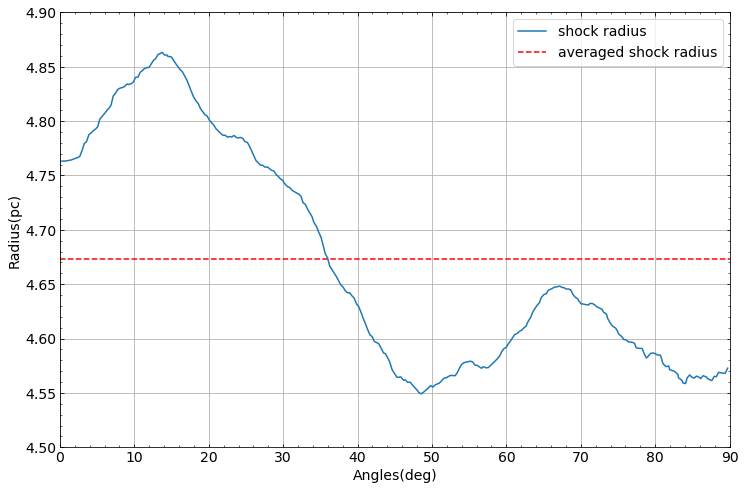

In [49]:
filename = 'radave300tycho_onlytur_2048_440yrs.txt'
X3,Y3 = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        X3.append(value[0])
        Y3.append(value[1])
X3new = np.array(X3)
Y3new = np.array(Y3) # in order for mean() and other statistics funs
#print(X1new)
#print(Y1new)
#print(Y1new.mean())



f2 = plt.figure(figsize=[12,8]) 
ax2 = f2.add_subplot(111) 
#plt.plot(Xnew,Ynew)
plt.plot(X3new,Y3new,label='shock radius')
plt.hlines(y=Y3new.mean(),xmin=0.0,xmax=90.0,colors='r',linestyles='--',label='averaged shock radius')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax2.set_xlabel(r'Angles(deg)',fontdict=font1) 
ax2.set_ylabel(r'Radius(pc)',fontdict=font1) 
ax2.axis([0.0,90.0,4.5,4.9])

[0.0, 90.0, 3.7, 4.4]

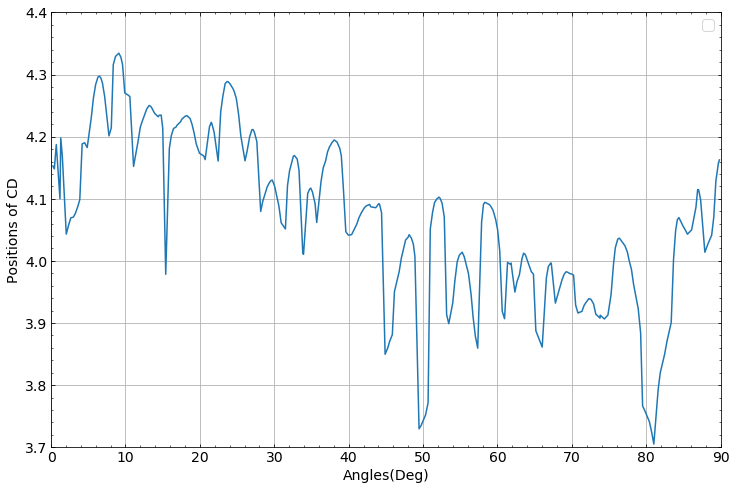

In [51]:
filename = 'rcdave300tycho_onlytur_2048_440yrs.txt'
Xcd3,Ycd3 = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        Xcd1.append(value[0])
        Ycd1.append(value[1])
Xcd3new = np.array(Xcd3)
Ycd3new = np.array(Ycd3) # in order for mean() and other statistics funs

fcd = plt.figure(figsize=[12,8]) 
ax3 = fcd.add_subplot(111) 
plt.plot(Xcd1new,Ycd1new)
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
ax3.set_xlabel(r'Angles(Deg)') 
ax3.set_ylabel(r'Positions of CD') 
ax3.axis([0.0,90.0,3.7,4.4])

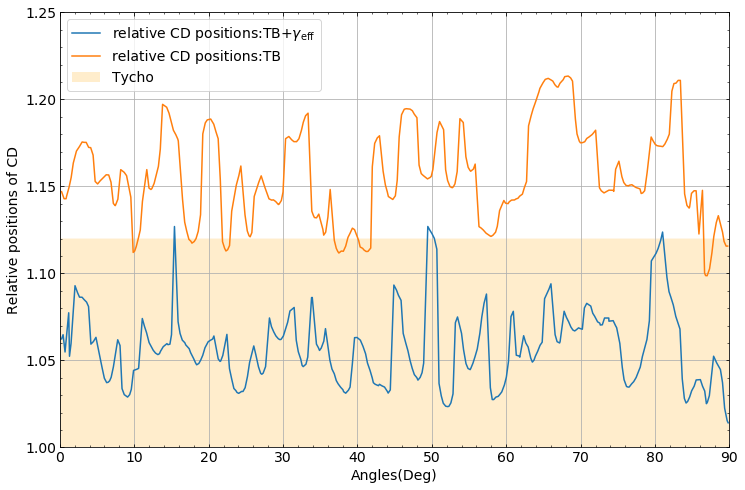

In [52]:
Xfill = np.linspace(0.0,90.0,1000)
y1=1.00
y2=1.12 #tycho warren 2005



filename = 'radave300tycho_onlytur_2048_440yrs.txt'
Xcdt1,Ycdt1 = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        Xcdt1.append(value[0])
        Ycdt1.append(value[1])
Xcdtnew1 = np.array(Xcdt1)
Ycdtnew1 = np.array(Ycdt1) # in order for mean() and other statistics funs


filename = 'rcdave300tycho_onlytur_2048_440yrs.txt'
Xcdt2,Ycdt2 = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        Xcdt2.append(value[0])
        Ycdt2.append(value[1])
Xcdtnew2 = np.array(Xcdt2)
Ycdtnew2 = np.array(Ycdt2) # in order for mean() and other statistics funs


fcd = plt.figure(figsize=[12,8]) 
ax1 = fcd.add_subplot(111) 
plt.plot(Xcd1new,Y1new/Ycd1new,label='relative CD positions:TB+$\gamma\mathregular{_{eff}}$')
plt.plot(Xcdtnew2,Ycdtnew1/Ycdtnew2,label='relative CD positions:TB')
plt.fill_between(Xfill,y1,y2,facecolor='orange',alpha=0.2,label='Tycho')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax1.set_xlabel(r'Angles(Deg)',font1) 
ax1.set_ylabel(r'Relative positions of CD',font1) 
ax1.axis([0.0,90.0,1.0,1.25])
#ax1.set_title(r'radius profile with t=1000 years')
plt.savefig('cd_ratio_Tycho_compared_2048.png',bbox_inches='tight')#不能存为pdf会跑挂